In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
from bs4 import BeautifulSoup
import html5lib
import requests

In [2]:
path = 'http://ergast.com/api/f1'
season = '2016'
race = '2'
URL = path + '/' + season + '/' + race + '/' + 'laps?limit=2500'
results = requests.get(URL)
soup = BeautifulSoup(results.content, 'lxml')

In [3]:
soup

<?xml version="1.0" encoding="utf-8"?><?xml-stylesheet type="text/xsl" href="http://ergast.com/schemas/mrd-1.4.xsl"?><html><body><mrdata limit="1000" offset="0" series="f1" total="1002" url="http://ergast.com/api/f1/2016/2/laps" xmlns="http://ergast.com/mrd/1.4">
<racetable round="2" season="2016">
<race round="2" season="2016" url="https://en.wikipedia.org/wiki/2016_Bahrain_Grand_Prix">
<racename>Bahrain Grand Prix</racename>
<circuit circuitid="bahrain" url="http://en.wikipedia.org/wiki/Bahrain_International_Circuit">
<circuitname>Bahrain International Circuit</circuitname>
<location lat="26.0325" long="50.5106">
<locality>Sakhir</locality>
<country>Bahrain</country>
</location>
</circuit>
<date>2016-04-03</date>
<time>15:00:00Z</time>
<lapslist>
<lap number="1">
<timing driverid="rosberg" lap="1" position="1" time="1:39.458"></timing>
<timing driverid="massa" lap="1" position="2" time="1:41.133"></timing>
<timing driverid="bottas" lap="1" position="3" time="1:41.950"></timing>
<timi

In [4]:
headers = ('driverid', 'lap', 'time')
num_rows = len(soup.find_all('timing'))
race_dict = {}
for header in headers:
    race_dict[header] = [race[header] for race in soup.find_all('timing')]
df = pd.DataFrame(race_dict)
df['minutes'] = [x.split(":")[0] for x in df['time']]
df['seconds'] = [x.split(":")[1] for x in df['time']]
df['lap_sec'] = df['minutes'].astype('int64') * 60 + df['seconds'].astype('float32')
df['lap'] = df['lap'].astype('int64')
df



,driverid,lap,time,minutes,seconds,lap_sec
0,rosberg,1,1:39.458,1,39.458,99.458000
1,massa,1,1:41.133,1,41.133,101.132999
2,bottas,1,1:41.950,1,41.950,101.950001
3,ricciardo,1,1:42.560,1,42.560,102.560001
4,raikkonen,1,1:43.779,1,43.779,103.778999
5,grosjean,1,1:44.134,1,44.134,104.133999
6,hamilton,1,1:44.787,1,44.787,104.786999
7,gutierrez,1,1:45.365,1,45.365,105.365002
8,max_verstappen,1,1:46.223,1,46.223,106.223000
9,button,1,1:46.579,1,46.579,106.578999


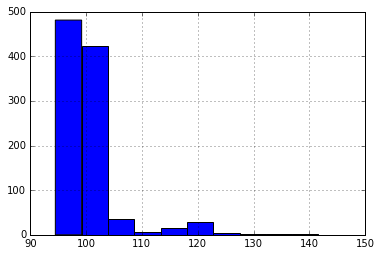

In [5]:
df['lap_sec'].hist()

In [6]:
pivot = df.pivot(index='driverid', columns='lap', values='lap_sec')

In [7]:
pivot

lap,1,2,3,4,5,6,7,8,9,10,...,48,49,50,51,52,53,54,55,56,57
driverid,,,,,,,,,,,,,,,,,,,,,
bottas,101.950001,98.576000,99.062000,99.333000,99.520000,99.911999,101.278999,104.598999,122.312000,113.125999,...,97.576000,97.818001,100.786999,98.219002,98.402000,98.339001,99.807999,98.847000,99.174999,NaN
button,106.578999,99.522999,99.426998,99.750999,99.895000,100.259998,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ericsson,109.664001,102.908001,100.453999,100.522999,100.881001,100.689999,100.886002,100.785999,100.821999,102.266998,...,100.403000,100.863998,100.146000,99.150002,99.130001,99.299999,100.073002,99.548000,99.780998,NaN
grosjean,104.133999,99.257999,98.917999,99.755001,99.430000,99.909000,100.167000,100.686001,100.414001,100.560001,...,96.986000,96.905998,97.313999,97.210999,97.214001,97.550999,97.926998,97.819000,97.551998,NaN
gutierrez,105.365002,99.341000,99.341999,99.835999,99.813000,99.792999,99.960999,108.258999,141.635000,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
hamilton,104.786999,99.207001,98.785999,98.028999,99.271999,99.895000,99.917000,98.992001,99.098000,99.054001,...,95.536999,95.557999,97.153999,97.201000,97.547001,98.297001,98.444000,98.397999,98.769001,102.037998
haryanto,110.037998,103.757999,101.259998,101.756001,100.778000,100.626999,100.942001,103.537998,101.018002,102.401001,...,96.918999,97.507000,97.293999,97.347000,99.372002,97.873001,98.127998,98.300999,98.706001,NaN
hulkenberg,108.980999,125.539000,98.404999,98.714001,99.026001,99.056999,99.480000,101.376999,100.625999,100.292000,...,98.643002,99.007999,99.355000,103.193001,117.943001,95.188000,95.639999,96.069000,97.176998,NaN
kevin_magnussen,110.313000,102.594002,101.069000,100.808998,100.707001,100.964001,101.064999,102.555000,101.278000,101.226002,...,100.203999,100.925999,98.362000,98.113998,98.081001,98.118000,98.612000,98.769001,98.856998,NaN


In [8]:
for i in range(2, 58):
    #print(i)
    pivot.ix[:,i] = pivot.ix[:,i-1:i].sum(axis=1)

In [9]:
pivot

lap,1,2,3,4,5,6,7,8,9,10,...,48,49,50,51,52,53,54,55,56,57
driverid,,,,,,,,,,,,,,,,,,,,,
bottas,101.950001,200.526001,299.588001,398.921001,498.441002,598.353001,699.632000,804.230999,926.542999,1039.668998,...,4833.840997,4931.658997,5032.445996,5130.664998,5229.066998,5327.405999,5427.213998,5526.060998,5625.235997,5625.235997
button,106.578999,206.101997,305.528996,405.279995,505.174995,605.434994,605.434994,605.434994,605.434994,605.434994,...,605.434994,605.434994,605.434994,605.434994,605.434994,605.434994,605.434994,605.434994,605.434994,605.434994
ericsson,109.664001,212.572002,313.026001,413.549000,514.430000,615.119999,716.006001,816.792000,917.613998,1019.880997,...,4855.784993,4956.648991,5056.794991,5155.944993,5255.074994,5354.374993,5454.447995,5553.995995,5653.776993,5653.776993
grosjean,104.133999,203.391998,302.309998,402.064999,501.494999,601.403999,701.570999,802.257000,902.671001,1003.231003,...,4815.491005,4912.397003,5009.711002,5106.922001,5204.136001,5301.687000,5399.613998,5497.432998,5594.984996,5594.984996
gutierrez,105.365002,204.706001,304.048000,403.883999,503.696999,603.489998,703.450996,811.709995,953.344995,953.344995,...,953.344995,953.344995,953.344995,953.344995,953.344995,953.344995,953.344995,953.344995,953.344995,953.344995
hamilton,104.786999,203.993999,302.779999,400.808998,500.080997,599.975998,699.892998,798.884998,897.982998,997.036999,...,4761.438004,4856.996002,4954.150002,5051.351002,5148.898003,5247.195004,5345.639004,5444.037003,5542.806004,5644.844002
haryanto,110.037998,213.795998,315.055996,416.811996,517.589996,618.216995,719.158997,822.696995,923.714996,1026.115997,...,4899.696999,4997.203999,5094.497998,5191.844998,5291.216999,5389.090000,5487.217999,5585.518997,5684.224999,5684.224999
hulkenberg,108.980999,234.519999,332.924998,431.638999,530.664999,629.721999,729.201998,830.578997,931.204997,1031.496996,...,4859.870997,4958.878996,5058.233996,5161.426997,5279.369998,5374.557997,5470.197997,5566.266997,5663.443995,5663.443995
kevin_magnussen,110.313000,212.907001,313.976002,414.785000,515.492001,616.456001,717.521000,820.076000,921.354000,1022.580002,...,4856.145002,4957.071000,5055.433000,5153.546998,5251.628000,5349.746000,5448.357999,5547.127000,5645.983999,5645.983999


In [10]:
unpivot = pivot.stack()

In [11]:
new_df = unpivot.reset_index()

In [12]:
new_df.columns = ['driverid', 'lap', 'cume_sec']
new_df

,driverid,lap,cume_sec
0,bottas,1,101.950001
1,bottas,2,200.526001
2,bottas,3,299.588001
3,bottas,4,398.921001
4,bottas,5,498.441002
5,bottas,6,598.353001
6,bottas,7,699.632000
7,bottas,8,804.230999
8,bottas,9,926.542999
9,bottas,10,1039.668998


In [13]:
new_df.sort_values('cume_sec', ascending=True, inplace=True)

In [14]:
new_df

,driverid,lap,cume_sec
912,rosberg,1,99.458000
570,massa,1,101.132999
0,bottas,1,101.950001
855,ricciardo,1,102.560001
798,raikkonen,1,103.778999
171,grosjean,1,104.133999
285,hamilton,1,104.786999
228,gutierrez,1,105.365002
627,max_verstappen,1,106.223000
57,button,1,106.578999


In [15]:
from f1 import Team
from f1 import Race

In [16]:
ThisRace = Race('Bahrain')
df_score = ThisRace.score()
df_score

C:\users\jason\documents\gitrepos\fantasy-formula-one\f1.py:227: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  fantasy_points['Movement_Pts'][fantasy_points['Movement_Pts'] < 0] = 0


,Team,Qualifying,Grid,Eff_Grid,Finish,Qual_Pts,Fin_Pts,Team_Pts,Movement_Pts,Completion,Fst_Lap,Total_Race_Pts
Kimi Räikkönen,Ferrari,4,4,3,2,2,9,1,1,3,0,16
Sebastian Vettel,Ferrari,3,DNS,NaN,DNS,2,0,0,0,0,0,2
Nico Hülkenberg,Force India-Mercedes,8,8,7,15,2,0,1,0,3,0,6
Sergio Pérez,Force India-Mercedes,18,18,14,16,0,0,0,0,3,0,3
Romain Grosjean,Haas-Ferrari,9,9,8,5,1,6,1,3,3,0,14
Esteban Gutiérrez,Haas-Ferrari,13,13,NaN,Ret,1,0,0,0,0,0,1
Pascal Wehrlein,MRT-Mercedes,16,16,12,13,0,0,1,0,3,0,4
Rio Haryanto,MRT-Mercedes,21,20,15,17,0,0,0,0,3,0,3
Stoffel Vandoorne,McLaren-Honda,12,12,10,10,1,1,1,0,3,0,6
Jenson Button,McLaren-Honda,14,14,NaN,Ret,1,0,0,0,0,0,1


In [25]:
current = pd.DataFrame(columns=['position', 'lap'])
current['position'] = df_score['Grid'].copy()
current['lap'] = 0
current['position'][current['position'] == 'DNS'] = np.NaN
current

C:\Users\Jason\Anaconda3\lib\site-packages\ipykernel\__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,position,lap
Kimi Räikkönen,4,0
Sebastian Vettel,NaN,0
Nico Hülkenberg,8,0
Sergio Pérez,18,0
Romain Grosjean,9,0
Esteban Gutiérrez,13,0
Pascal Wehrlein,16,0
Rio Haryanto,20,0
Stoffel Vandoorne,12,0
Jenson Button,14,0


In [27]:
ThisRace.laps_completed

{'Carlos Sainz Jr.': '29',
 'Daniel Ricciardo': '57',
 'Daniil Kvyat': '56',
 'Esteban Gutiérrez': '10',
 'Felipe Massa': '56',
 'Felipe Nasr': '56',
 'Jenson Button': '6',
 'Jolyon Palmer': '0',
 'Kevin Magnussen': '56',
 'Kimi Räikkönen': '57',
 'Lewis Hamilton': '57',
 'Marcus Ericsson': '56',
 'Max Verstappen': '57',
 'Nico Hülkenberg': '56',
 'Nico Rosberg': '57',
 'Pascal Wehrlein': '56',
 'Rio Haryanto': '56',
 'Romain Grosjean': '57',
 'Sebastian Vettel': '0',
 'Sergio Pérez': '56',
 'Stoffel Vandoorne': '56',
 'Valtteri Bottas': '56'}